In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/confused-eeg/EEG_data.csv
/kaggle/input/confused-eeg/demographic_info.csv
/kaggle/input/confused-eeg/videos/7.m4v
/kaggle/input/confused-eeg/videos/1.m4v
/kaggle/input/confused-eeg/videos/6.m4v
/kaggle/input/confused-eeg/videos/8.m4v
/kaggle/input/confused-eeg/videos/3.m4v
/kaggle/input/confused-eeg/videos/5.m4v
/kaggle/input/confused-eeg/videos/0.m4v
/kaggle/input/confused-eeg/videos/4.m4v
/kaggle/input/confused-eeg/videos/2.m4v
/kaggle/input/confused-eeg/videos/9.m4v


# Feel free to *comment* or **Praise** on the method to reach the *Solution* of this problem.
# As it is defined before every step!

### *Reading* the datasets

In [3]:
df=pd.read_csv('../input/confused-eeg/EEG_data.csv')
data = pd.read_csv('../input/confused-eeg/demographic_info.csv')

### Merging the datasets on **Subject-ID**
#### *Few* of the columns-names had some extra space before them

In [4]:
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### *Exploring* the dataset is most crucial part for reaching till the solution.
1. See the shape
2. Find the missing columns
3. Convert the **String** data-type columns to *Numerical* ones
4. Check for imbalanced data-sets

In [5]:
df.shape

(12811, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

In [7]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

#### *Converting* the **Categorical** columns to numerical ones

In [9]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

In [10]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,0,1


In [11]:
df['VideoID'].value_counts()

1.0    1414
0.0    1412
4.0    1356
9.0    1281
8.0    1280
2.0    1274
5.0    1230
3.0    1206
6.0    1181
7.0    1177
Name: VideoID, dtype: int64

#### Checking for *Imbalanced-dataset*

In [12]:
df['predefinedlabel'].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [13]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

In [14]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.301538,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.641169,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,2.000000,1.000000


# Time for some *EDA* to **Identify** the Feature-columns that are aligned with our *Target*-class

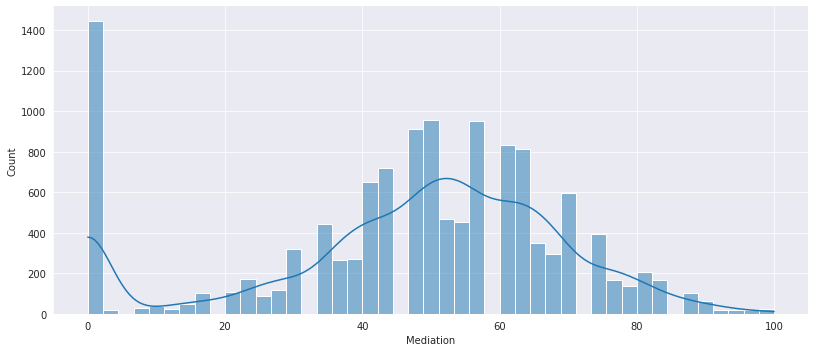

In [15]:
sns.set_style('darkgrid')
sns.displot(data=df,x='Mediation',kde=True,aspect=16/7)

#### Most of the subjects were doing meditation before experiment!

<AxesSubplot:xlabel='Mediation', ylabel='Attention'>

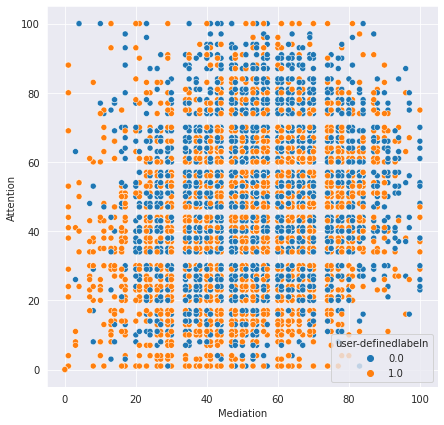

In [17]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Attention',hue='user-definedlabeln')

<AxesSubplot:xlabel='Mediation', ylabel='Raw'>

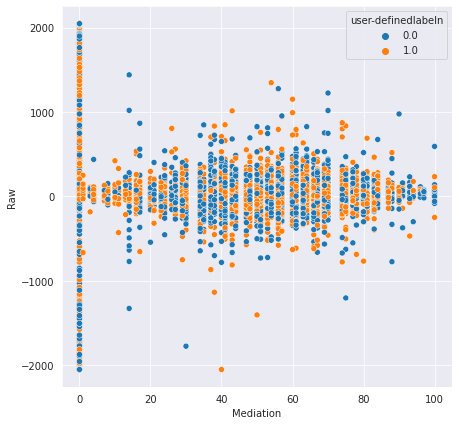

In [19]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Raw',hue='user-definedlabeln')

<AxesSubplot:xlabel='Mediation', ylabel='Theta'>

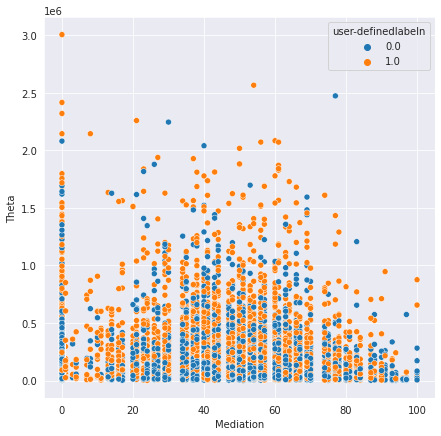

In [20]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Theta',hue='user-definedlabeln')

<AxesSubplot:xlabel='Mediation', ylabel='Alpha1'>

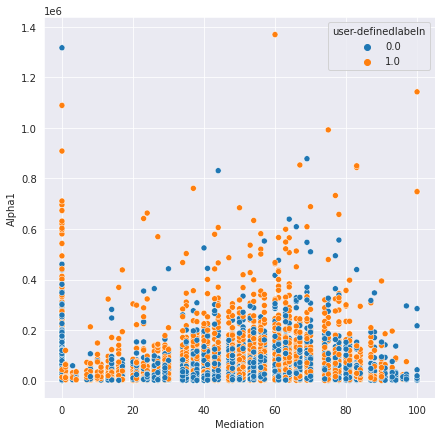

In [21]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Alpha1',hue='user-definedlabeln')

<AxesSubplot:xlabel='Mediation', ylabel='Gamma1'>

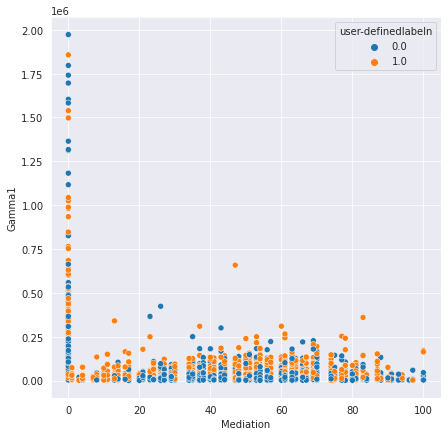

In [22]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Gamma1',hue='user-definedlabeln')

## No *direct* relationship is identified between Features and Target-variable

# Importing library to perform
#  *Feature*-**Selection** 

In [24]:
from sklearn.feature_selection import mutual_info_classif

### Separating-out feature-set and `Target-column` 

### Mutual-info gives the score to each **Feature** which describes its *Relationship* with `Target` variable

In [25]:
y=pd.get_dummies(df['user-definedlabeln'])
mi_score=mutual_info_classif(df.drop('user-definedlabeln',axis=1),df['user-definedlabeln'])
mi_score=pd.Series(mi_score,index=df.drop('user-definedlabeln',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

VideoID            6.469254
Attention          2.633761
Alpha2             2.509470
Gamma1             2.495223
Delta              2.403310
Beta1              2.175141
Theta              2.153580
Alpha1             2.043350
Gamma2             1.672598
Beta2              1.393694
Raw                0.811432
Mediation          0.728328
SubjectID          0.524085
predefinedlabel    0.425158
ethnicity          0.124336
age                0.095238
gender             0.000000
dtype: float64

### Selecting top-14 features

In [26]:
mi_score.head(14).index

Index(['VideoID', 'Attention', 'Alpha2', 'Gamma1', 'Delta', 'Beta1', 'Theta',
       'Alpha1', 'Gamma2', 'Beta2', 'Raw', 'Mediation', 'SubjectID',
       'predefinedlabel'],
      dtype='object')

In [27]:
top_fea=['VideoID', 'Attention', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1',
       'Alpha1', 'Mediation', 'Gamma2', 'SubjectID', 'Beta2', 'Raw', 'age']

# Scaling our *Feature*-set

In [29]:
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(df[top_fea])

# Importing libraries to build **Neural-Network**

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

2022-12-24 00:47:59.870625: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


### *Splitting* the dataset into:
1. Training_Features, Training_Target
2. Testing_Features, Testing_Target
3. Validation_Features, Validation_Target

In [31]:
from sklearn.model_selection import train_test_split
Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(Xtr,Ytr,random_state=108,test_size=0.27)

## 1. Building our model
## 2. Compiling the model
## 3. Fitting the model

In [33]:
# Model-Building step, stacking the hidden layers
model=keras.Sequential([
    layers.Dense(64,input_shape=(14,),activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(248,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),   
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),   
    layers.Dense(664,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    layers.Dense(264,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2,activation='sigmoid')
])
#Compiling the model with Adamax Optimizer
model.compile(optimizer='adamax',loss='binary_crossentropy',metrics='accuracy')

In [34]:
#Creating the callback feature to stop the training in-Between, in case of no improvement
call=callbacks.EarlyStopping(patience=20,min_delta=0.0001,restore_best_weights=True)
#Fitting the model
history=model.fit(xtr,ytr,validation_data=(xval,yval),batch_size=28,epochs=150,callbacks=[call])

2022-12-24 00:49:25.382578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-24 00:49:25.395354: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/150


2022-12-24 00:49:27.301617: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 18/244 [=>............................] - ETA: 1s - loss: 0.9645 - accuracy: 0.5122 

2022-12-24 00:49:28.235099: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


244/244 [==============================] - 5s 9ms/step - loss: 0.8877 - accuracy: 0.5276 - val_loss: 0.7419 - val_accuracy: 0.5194
Epoch 2/150
244/244 [==============================] - 2s 7ms/step - loss: 0.7869 - accuracy: 0.5555 - val_loss: 0.6272 - val_accuracy: 0.6698
Epoch 3/150
244/244 [==============================] - 2s 7ms/step - loss: 0.7347 - accuracy: 0.5666 - val_loss: 0.6372 - val_accuracy: 0.6496
Epoch 4/150
244/244 [==============================] - 2s 8ms/step - loss: 0.7146 - accuracy: 0.5776 - val_loss: 0.6138 - val_accuracy: 0.6750
Epoch 5/150
244/244 [==============================] - 2s 7ms/step - loss: 0.6977 - accuracy: 0.5924 - val_loss: 0.6036 - val_accuracy: 0.6750
Epoch 6/150
244/244 [==============================] - 2s 7ms/step - loss: 0.6797 - accuracy: 0.6111 - val_loss: 0.5944 - val_accuracy: 0.6888
Epoch 7/150
244/244 [==============================] - 2s 7ms/step - loss: 0.6631 - accuracy: 0.6308 - val_loss: 0.6004 - val_accuracy: 0.6841
Epoch 8/150

## Time for some **Evaluations**

In [36]:
model.evaluate(xte,yte)

109/109 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9384


[0.15129819512367249, 0.9384214878082275]

# More than 99% Accuracy achieved!!!

In [39]:
training=pd.DataFrame(history.history)

### Plotting the history of Neural-Network

<AxesSubplot:>

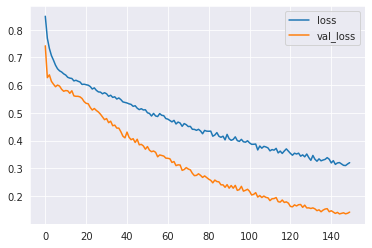

In [40]:
training.loc[:,['loss','val_loss']].plot()

<AxesSubplot:>

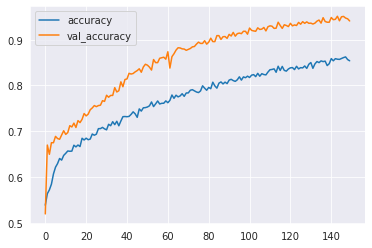

In [41]:
training.loc[:,['accuracy','val_accuracy']].plot()

# Feel-Free to give some advice or shower-support!